# Features com diferentes escalas
- **"Se uma característica tem uma variância que é ordem de grandeza maior do que outras, ela pode dominar a função objetivo e tornar o estimador incapaz de aprender com outras características corretamente, como esperado"**
- Resumindo, o modelo pode colocar mais peso nas variáveis que possuem maior escala e acabar desconsiderando variáveis com menor escala mas que sejam igualmente ou mais importantes (em algoritmos que consideram a distância)
    - Ex: comparar salário com número de filhos (se usarmos a distância euclidiana por exemplo, a variável com maior escala irá dominar o cálculo)
- **O objetivo é colocar todos os nossos recursos em escalas próximas para que o modelo entenda cada um deles como igualmente importantes**
- Não estamos mudando o formato dos dados, apenas a escala 

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando os dados do titanic após as etapas de Data Cleaning
titanic = pd.read_csv('train2.csv')

In [3]:
# Visualizando a tabela
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titulos
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs


In [4]:
# Podemos visualizar as informações estatísticas dessa base
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.430535,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.551396,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.724891,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.750000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Observe que o Pclass e o Age estão em **escalas muito diferentes e isso pode prejudicar o modelo, principalmente algoritmos que utilizam distâncias entre os pontos**

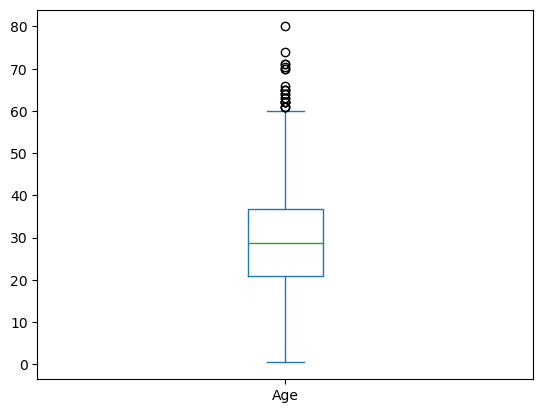

In [5]:
# Visualizando o boxplot da coluna Age
titanic.Age.plot.box();

### Padronização
- Redimensionamento dos recursos para garantir que os novos dados tenham **média zero e desvio padrão igual a 1**
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
- Segundo a própria documentação do scikit-learn, alguns estimadores **"podem se comportar mal se os recursos individuais não se parecerem mais ou menos com dados padrões normalmente distribuídos (por exemplo, Gaussiano com média zero e variância unitária)"**
    - "Na prática, muitas vezes ignoramos a forma da distribuição e apenas transformamos os dados para centralizá-los"
- A escala padrão será dada por:
    - **z = (x - u) / s**, onde:
        - **u:** média das amostras
        - **s:** desvio padrão das amostras
- Importante considerar que a padronização é mais robusta a outliers que a normalização (que falaremos em seguida)
- A padronização também facilita a convergência para alguns algoritmos, como o gradiente descendente (que vamos falar no módulo de redes neurais)

In [6]:
# Importando o StandardScaler
from sklearn.preprocessing import StandardScaler

In [7]:
# Criando nosso scaler
scaler = StandardScaler()

In [8]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Age']])

In [9]:
# Fazendo o transform dos dados
titanic['Age_padrao'] = scaler.transform(titanic[['Age']])

In [10]:
# Agora visualizando estatisticamente esses dados
titanic[['Age','Age_padrao']].describe()

,Age,Age_padrao
count,891.000000,8.910000e+02
mean,29.430535,-1.458492e-16
std,13.551396,1.000562e+00
min,0.420000,-2.141981e+00
25%,21.000000,-6.224650e-01
50%,28.724891,-5.210091e-02
75%,36.750000,5.404297e-01
max,80.000000,3.733775e+00


In [11]:
# Podemos inclusive verificar apenas a média
titanic.Age_padrao.mean()

-1.4584916389716562e-16

In [12]:
# E o desvio padrão
titanic.Age_padrao.std()

1.0005616400330455

### Normalização
- Uma alternativa a padronização é **normalizar os dados entre um valor mínimo e máximo (geralmente entre 0 e 1)**
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
- A transformação é dada por:
    - **X_scaled = <font color='blue'>X_std</font>.(max - min) + min**, sendo:
        - **<font color='blue'>X_std</font> = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))**
- Em geral, vamos obter desvios padrões menores (dados mais concentrados próximo a média) e a normalização é muito útil quando queremos manter os valores zeros do dataset

In [13]:
# Visualizando o "describe"
titanic.Age.describe()

count    891.000000
mean      29.430535
std       13.551396
min        0.420000
25%       21.000000
50%       28.724891
75%       36.750000
max       80.000000
Name: Age, dtype: float64

In [14]:
# Selecionando o máximo e mínimo da coluna Age
minimo = titanic.Age.min()
maximo = titanic.Age.max()
print(minimo,maximo)

0.42 80.0


In [15]:
# Selecionando a primeira linha do Age
X = titanic.Age[0]

In [16]:
# Fazendo o X_std
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_std = (X - minimo) / (maximo - minimo)
X_std

0.2711736617240513

In [17]:
# Calculando o X_scaled
# X_scaled = X_std.(max - min) + min
X_scaled = X_std*(1-0) + 0
X_scaled

0.2711736617240513

In [18]:
# Importando o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Criando o scaler
scaler = MinMaxScaler()

In [20]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Age']])

In [21]:
# Fazendo a transformação
titanic['Age_minmax'] = scaler.transform(titanic[['Age']])

In [22]:
# Visualizando novamente os dados
titanic[['Age','Age_padrao','Age_minmax']].describe()

,Age,Age_padrao,Age_minmax
count,891.000000,8.910000e+02,891.000000
mean,29.430535,-1.458492e-16,0.364546
std,13.551396,1.000562e+00,0.170286
min,0.420000,-2.141981e+00,0.000000
25%,21.000000,-6.224650e-01,0.258608
50%,28.724891,-5.210091e-02,0.355678
75%,36.750000,5.404297e-01,0.456522
max,80.000000,3.733775e+00,1.000000


### Redimensionando dados dispersos  / com outliers
- O **MaxAbsScaler** funciona de uma maneira semelhante, porém dividindo todos os dados pelo **máximo absoluto** daquela coluna
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler
    - Isso faz com que o range seja de -1 a 1 caso existam valores negativos
    - **Funciona muito bem para trabalhar com dados esparsos (dispersos / espalhados)**

In [23]:
# Importando o MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

In [24]:
# Criando o scaler
scaler = MaxAbsScaler()

In [25]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Age']])

In [26]:
# Fazendo a transformação
titanic['Age_maxabs'] = scaler.transform(titanic[['Age']])

In [27]:
# Visualizando novamente os dados
colunas = titanic.columns[titanic.columns.str.contains('Age')]
titanic[colunas].describe()

,Age,Age_padrao,Age_minmax,Age_maxabs
count,891.000000,8.910000e+02,891.000000,891.000000
mean,29.430535,-1.458492e-16,0.364546,0.367882
std,13.551396,1.000562e+00,0.170286,0.169392
min,0.420000,-2.141981e+00,0.000000,0.005250
25%,21.000000,-6.224650e-01,0.258608,0.262500
50%,28.724891,-5.210091e-02,0.355678,0.359061
75%,36.750000,5.404297e-01,0.456522,0.459375
max,80.000000,3.733775e+00,1.000000,1.000000


- Se os dados tiverem muitos outliers, utilizar os métodos mostrados anteriormente pode não funcionar tão bem. Como alternativa podemos utilizar o **RobustScaler**
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler
    - **Vai usar o interquartil como base do redimensionamento**
        - Interquartil: Q3 - Q1

In [28]:
# Importando o RobustScaler
from sklearn.preprocessing import RobustScaler

In [29]:
# Criando o scaler
scaler = RobustScaler()

In [30]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Age']])

In [31]:
# Fazendo a transformação
titanic['Age_robust'] = scaler.transform(titanic[['Age']])

In [32]:
# Selecionando as colunas que queremos analisar
colunas = titanic.columns[titanic.columns.str.contains('Age')]

In [33]:
# Visualizando novamente os dados
titanic[colunas].describe()

,Age,Age_padrao,Age_minmax,Age_maxabs,Age_robust
count,891.000000,8.910000e+02,891.000000,891.000000,891.000000
mean,29.430535,-1.458492e-16,0.364546,0.367882,0.044803
std,13.551396,1.000562e+00,0.170286,0.169392,0.860406
min,0.420000,-2.141981e+00,0.000000,0.005250,-1.797136
25%,21.000000,-6.224650e-01,0.258608,0.262500,-0.490469
50%,28.724891,-5.210091e-02,0.355678,0.359061,0.000000
75%,36.750000,5.404297e-01,0.456522,0.459375,0.509531
max,80.000000,3.733775e+00,1.000000,1.000000,3.255562


- Podemos melhorar esse visual utilizando o KDE do seaborn
    - https://seaborn.pydata.org/generated/seaborn.kdeplot.html

In [34]:
# Importando o seaborn
import seaborn as sns

<AxesSubplot: xlabel='Age', ylabel='Count'>

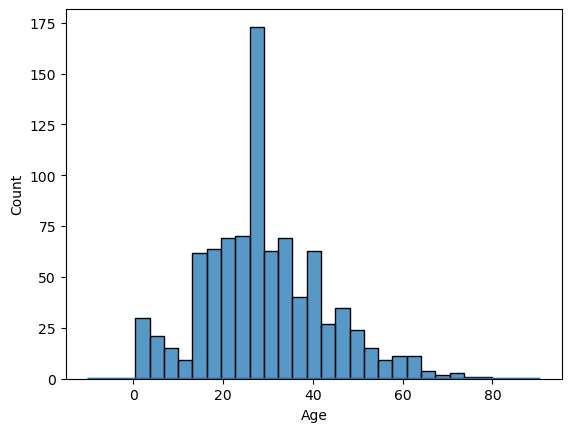

In [37]:
# Visualizando graficamente
sns.histplot(titanic.Age)
sns.kdeplot(titanic.Age)

- **Podemos fazer o cálculo passo a passo de cada um desses valores**

In [ ]:
# Visualizando novamente a descrição estatística

In [ ]:
# Visualizando a média da coluna

In [ ]:
# O desvio padrão

In [ ]:
# O mínimo

In [ ]:
# E o máximo

- Calculando para o StandardScaler

In [ ]:
# O mínimo

In [ ]:
# O máximo

- Para o MinMaxScaler, o mínimo vai ser 0 e o máximo vai ser 1

- Agora verificando para o MaxAbsScaler

In [ ]:
# O mínimo

In [ ]:
# O máximo

- E para o RobustScaler

In [ ]:
# Calculando a mediana da coluna Age

In [ ]:
# Verificando o primeiro quartil

In [ ]:
# O terceiro quartil

In [ ]:
# E o interquartil

In [ ]:
# Agora calculando para o mínimo

In [ ]:
# E para o mínimo

- **Podemos fazer agora com a coluna Fare**

In [ ]:
# Selecionando a coluna

In [ ]:
# Utilizando o StandardScaler

In [ ]:
# Fazendo o fit com os dados

In [ ]:
# Transformando

In [ ]:
# Utilizando o RobustScaler

In [ ]:
# Fazendo o fit com os dados

In [ ]:
# Transformando

In [ ]:
# Utilizando o MinMaxScaler

In [ ]:
# Fazendo o fit com os dados

In [ ]:
# Transformando

In [ ]:
# Selecionando as colunas com Fare

In [ ]:
# E fazendo o describe dessas colunas

- **Comparando visualmente**

In [ ]:
# Visualizando graficamente

- Podemos usar a própria documentação do matplotlib para comparar essas curvas
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [ ]:
# Utilizando a variável hist1 para o histograma

In [ ]:
# E então retornando essa variável

<a id="histogramas"></a>
- Criando as variáveis n, bins e patches para os histogramas que queremos comparar

In [ ]:
# Criando n, bins e patches para os histogramas que desejamos comparar

In [ ]:
# Visualizando n1

In [ ]:
# n2

In [ ]:
# bins1

In [ ]:
# e bins2

In [ ]:
# Verificando a diferença de comprimento das barras para o primeiro histograma

In [ ]:
# E para o segundo

In [ ]:
# Visualizando graficamente os primeiros valores

- Podemos [voltar](#histogramas) a visualizar essas mesmas informações para qualquer coluna do "Fare"

- E até [voltar](#histogramas) e utilizar as informações de "Age"